# LowLou Potential

In [ ]:
from setproctitle import setproctitle
setproctitle("LowLou")

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "2"

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
b_bottom_path = os.path.expanduser('~/workspace/_data/lowlou_64_64_64/b_bottom.npy')
Nz = 64

In [ ]:
from pathlib import Path

In [ ]:
vtk_path = os.path.join(Path(b_bottom_path).parent, 'b_potential.vtk')

In [ ]:
with open(b_bottom_path, 'rb') as f:
    b_bottom = np.load(f)

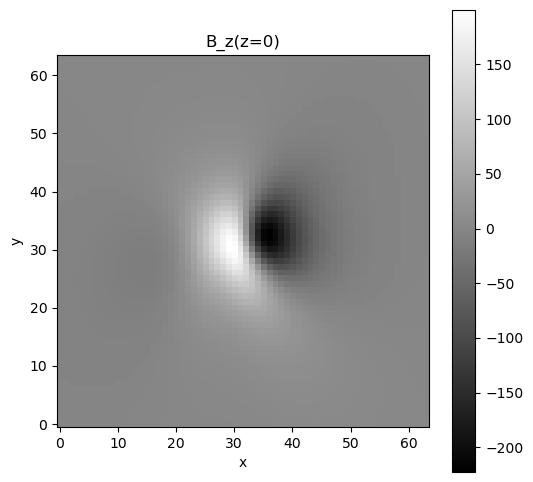

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.imshow(b_bottom[:, :, 2].transpose(), origin='lower', cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("B_z(z=0)")
fig.colorbar(CS)
plt.show()

In [ ]:
from cmspinn.potential_field import potential_cube

In [ ]:
bz_bottom = b_bottom[:, :, 2]
bz_bottom.shape

(64, 64)

In [ ]:
potential_maker = potential_cube(bz_bottom, Nz)

In [ ]:
potential_maker.cal_and_save_potential_field(vtk_path)

Potential Field: 100%|██████████| 128/128 [00:03<00:00, 33.76it/s]


StructuredGrid (0x7f376fe34c40)
  N Cells:      250047
  N Points:     262144
  X Bounds:     0.000e+00, 6.300e+01
  Y Bounds:     0.000e+00, 6.300e+01
  Z Bounds:     0.000e+00, 6.300e+01
  Dimensions:   64, 64, 64
  N Arrays:     2

In [ ]:
import pyvista as pv

In [ ]:
from cmspinn.mag_viz import mag_plotter

In [ ]:
pv.start_xvfb()
pv.global_theme.trame.server_proxy_enabled = True
pv.set_jupyter_backend('static')

In [ ]:
b_pot_mesh = pv.read(vtk_path)

In [ ]:
b_pot = mag_plotter(b_pot_mesh)

In [ ]:
vmin = -200
vmax = 200

i_siz = 32
j_siz = 32

i_res = 10
j_res = 10

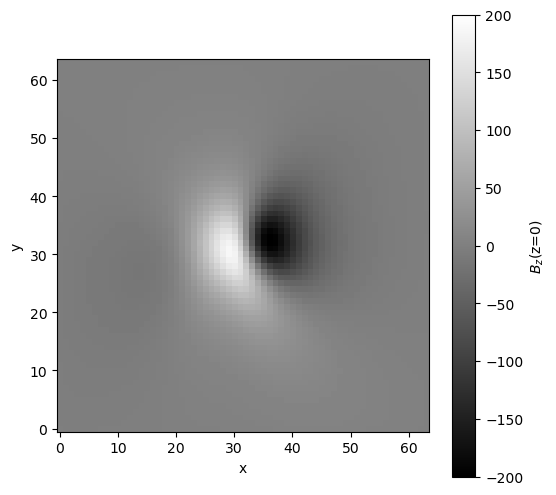

In [ ]:
b_pot.plt_Bz_imshow(z=0, vmin=vmin, vmax=vmax)

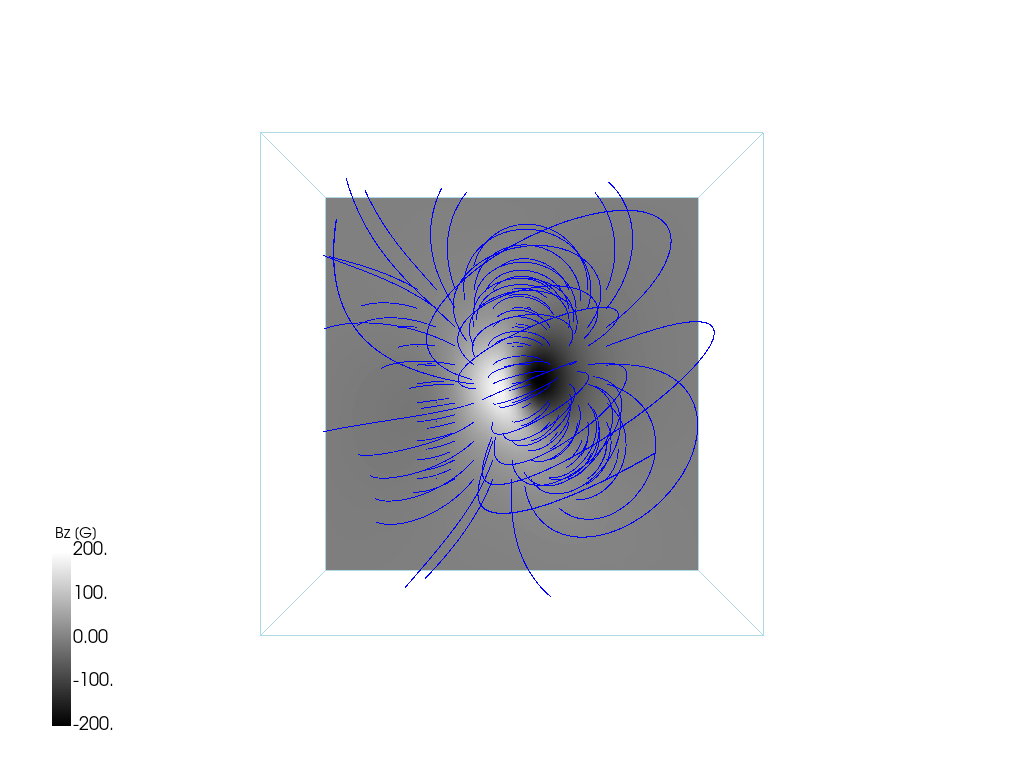

<pyvista.plotting.plotter.Plotter>

In [ ]:
b_pot.pv_streamline_Bz(camera_position='xy', i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax)

In [ ]:
vtk_path = os.path.join(Path(vtk_path).parent, 'b.vtk')

In [ ]:
b_mesh = pv.read(vtk_path)

In [ ]:
b = mag_plotter(b_mesh)

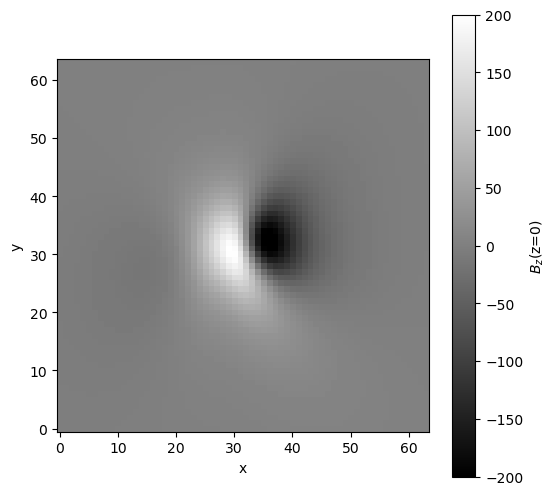

In [ ]:
b.plt_Bz_imshow(z=0, vmin=vmin, vmax=vmax)

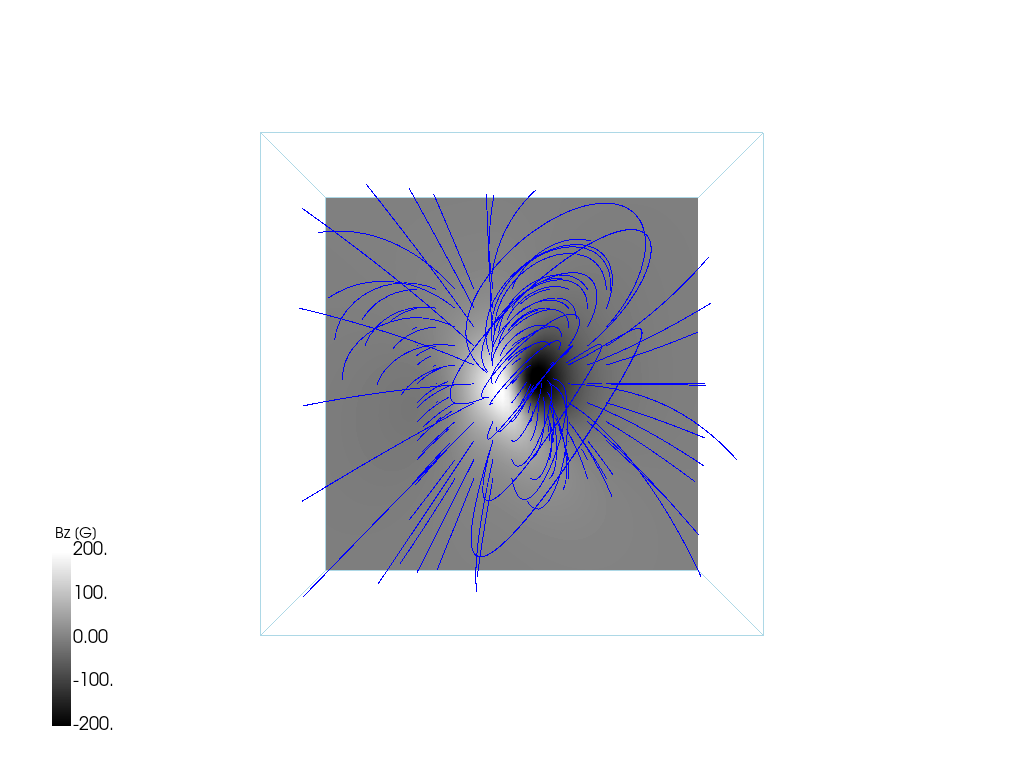

<pyvista.plotting.plotter.Plotter>

In [ ]:
b.pv_streamline_Bz(camera_position='xy', i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax)